In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import Landing3DModel
import Landing3DCost
import Landing3DConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [64]:
ix = 14
iu = 3
ih = 7
delT = 0.1
N = 50
delT = 0.1
max_iter = 20

In [67]:
xi = np.array([2,1,1,4,0,0,-1,1,0,0,0,0,0,0])
xf = np.array([2,0,0,0,0,0,0,1,0,0,0,0,0,0])

myModel = Landing3DModel.Landing3D('Hello',ix,iu,delT)
myCost = Landing3DCost.Landing3D('Hello',ix,iu,N)
myConst = Landing3DConstraints.Landing3D('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf

u0 = np.zeros((N+1,iu))
u0[:,2] = 2

In [68]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst,type_discretization='foh')
x,u,xbar,ubar = i1.update(x0,u0)

        1.55 Boundary conditions are not satisified: just accept this step
iteration   cost        ||vc||    ||tr||    reduction    expected    w_tr
0           0           0           0           -0.0129     -0.0129     0.0         
      0.0307 Boundary conditions are not satisified: just accept this step
1           0           6.91e-12    12.9        0.0124      0.0124      0.0         
non-positive expected reduction
2           0           5.75e-11    0.473       -0.00211    -0.00211    0.0         
3           0           2.59e-07    0.000942    0.00256     0.00256     0.0         
SUCCEESS: virtual control and trust region < tol


In [54]:
ubar[-1]

array([-0.54515545, -0.54515544,  2.86805541])

In [55]:
# x = i1.x
# u = i1.u

u_norm = np.linalg.norm(u,axis=1)

(0.0, 2.5)

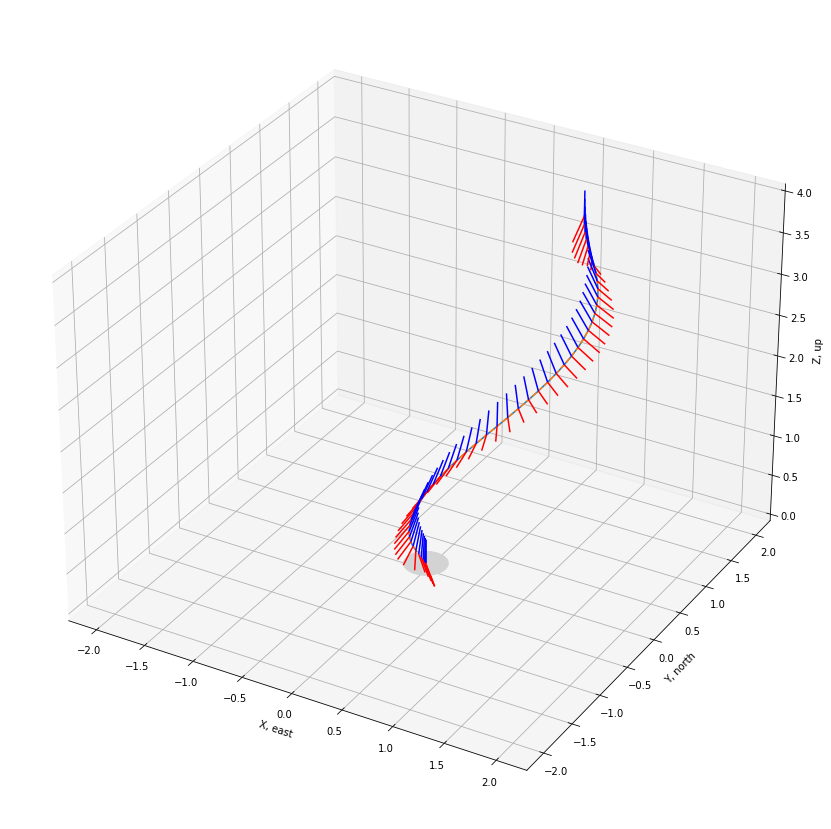

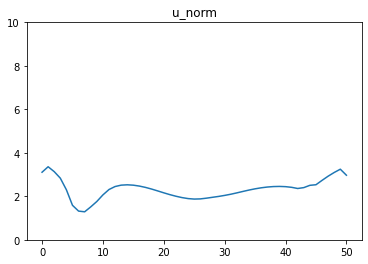

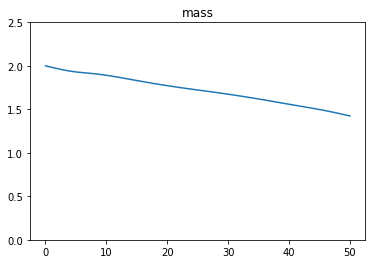

In [56]:
from utils import plot_rocket3d
from utils import make_rocket3d_trajectory_fig
fig = plt.figure(1,figsize=(15,15))
plot_rocket3d(fig,xbar,ubar,x)
plt.figure()
plt.plot(u_norm)
plt.ylim([0,10])
plt.title('u_norm')
plt.figure()
plt.plot(x[:,0])
# plt.ylim([0,10])
plt.title('mass')
plt.ylim([0,2.5])

In [ ]:
make_rocket3d_trajectory_fig(x,u,'Landing3D')